# Stationary properties
1. Focus on What is stationary ?
2. How to identify stationary ?
3. Non-stationary data
4. How to convert non-stationary data to stationary data

In [3]:
!pip install -q statsmodels -U
!pip install -q kaggle

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = '/content/'

In [6]:
!chmod 600 /content/kaggle.json

In [7]:
!kaggle datasets download -d rakannimer/air-passengers

Dataset URL: https://www.kaggle.com/datasets/rakannimer/air-passengers
License(s): DbCL-1.0
air-passengers.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!unzip air-passengers.zip

Archive:  air-passengers.zip
  inflating: AirPassengers.csv       


# Section 0: Data preparation

In [10]:
df = pd.read_csv("AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [11]:
df.isnull().sum()

,0
Month,0
#Passengers,0


In [59]:
df["Month"] = pd.to_datetime(df["Month"], infer_datetime_format=True)
df.set_index("Month", inplace=True)
df.head()

/tmp/ipython-input-3698901728.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["Month"] = pd.to_datetime(df["Month"], infer_datetime_format=True)


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Section 1: Stationary times series

In [13]:
window = 15 # for calculate mean and variance for each box
scale_val = 1

time = np.arange(100)
stationary = np.random.normal(loc=0, scale=scale_val, size=len(time))
stationary = pd.Series(stationary)

In [15]:
stationary.head()

,0
0,1.165582
1,-0.645137
2,1.946466
3,1.190710
4,-0.652280


# Section 2: Stationary identification

# 1. Constant mean and variance for each window

In [16]:
mean_a = stationary.rolling(window=window).mean()
mean_a.dropna(inplace=True)

std_a = stationary.rolling(window=window).std()
std_a.dropna(inplace=True)

In [17]:
print("First 20 data")
print(stationary[:20])
print("Mean first 10 window")
print(mean_a[:10])
print("Std first 10 window")
print(std_a[:10])

First 20 data
0     1.165582
1    -0.645137
2     1.946466
3     1.190710
4    -0.652280
5    -0.210164
6    -0.000916
7     0.377649
8     1.256570
9    -1.890945
10    0.656288
11    1.257110
12   -0.256028
13   -1.484068
14    1.040255
15    1.631348
16    0.057687
17    0.900618
18    0.246874
19    0.917423
dtype: float64
Mean first 10 window
14    0.250073
15    0.281124
16    0.327979
17    0.258256
18    0.195333
19    0.299980
20    0.314640
21    0.315487
22    0.357704
23    0.219272
dtype: float64
Std first 10 window
14    1.107485
15    1.141009
16    1.114376
17    1.035828
18    1.003296
19    0.990351
20    0.983866
21    0.983581
22    0.999894
23    1.010247
dtype: float64


<Axes: >

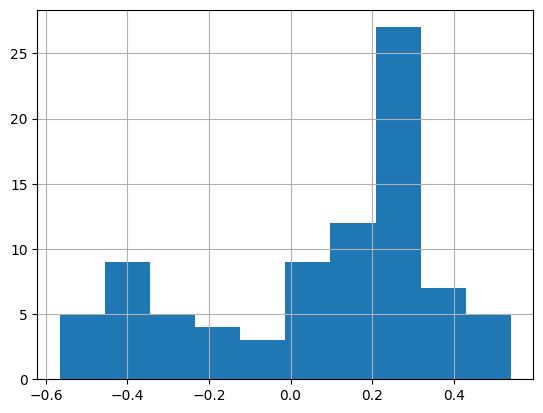

In [18]:
mean_a.hist()

<Axes: >

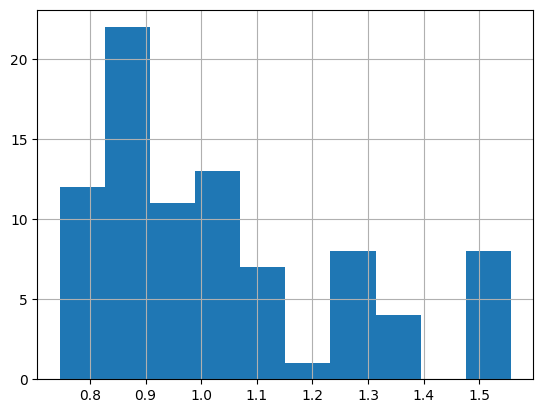

In [19]:
std_a.hist()

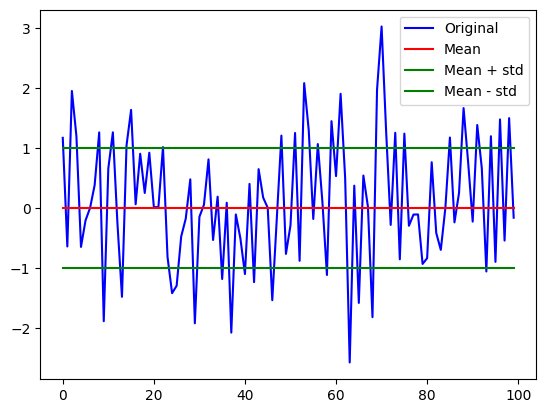

In [25]:
x = np.arange(len(stationary))
plt.plot(x, np.array(stationary), label="Original", color='blue')
plt.plot(x, np.zeros(len(stationary)), label='Mean', color='red')
plt.plot(x, scale_val*np.ones(len(stationary)), label='Mean + std', color='green')
plt.plot(x, -scale_val*np.ones(len(stationary)), label='Mean - std', color='green')
plt.legend(loc='upper right')
plt.show()

<Axes: >

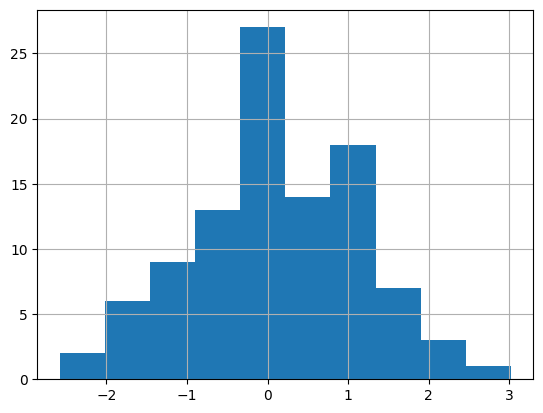

In [26]:
stationary.hist()

**Augmented Dickey-Fuller (ADF)**  
**null-hypothesis:** the series is nonstationary  
**Alternative-hypothesis:** the series is stationary

ADF dectect in edge of autocorrelation so if data have trend ADF can't detect it

In [28]:
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(stationary, autolag="AIC")
dftest = adfuller(stationary, autolag="AIC")
dfoutputs = pd.Series(dftest[:4], index=["Test statistic", "p-value", '#lags used', "Numner of observation used"])
for key, val in dftest[4].items():
  dfoutputs[f'Critical-values: {key}%'] = val

dfoutputs

,0
Test statistic,-1.064190e+01
p-value,4.905634e-19
#lags used,0.000000e+00
Numner of observation used,9.900000e+01
Critical-values: 1%%,-3.498198e+00
Critical-values: 5%%,-2.891208e+00
Critical-values: 10%%,-2.582596e+00


**Auto correlation**

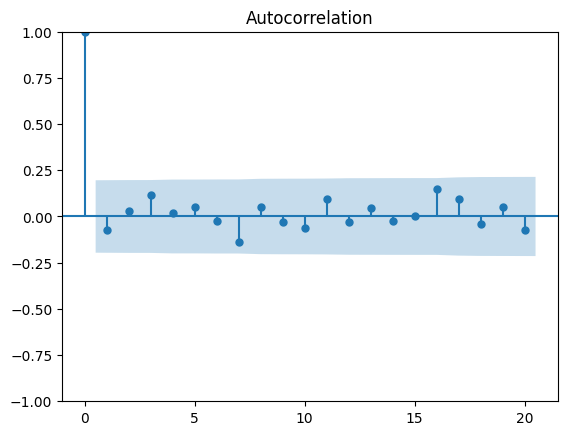

In [30]:
plot_acf(stationary)
plt.show()

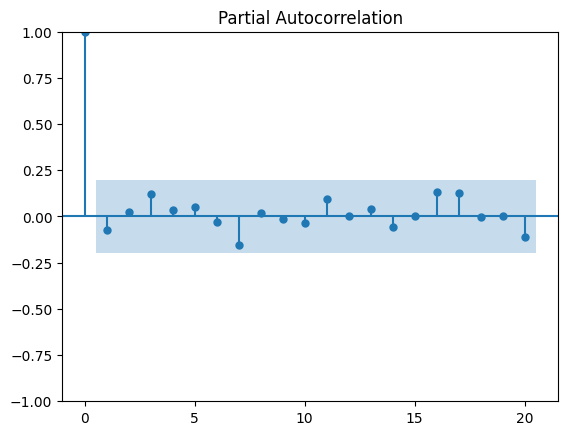

In [32]:
plot_pacf(stationary) # Partial auto correlation
plt.show()

# Section 3: Non-stationary data

In [34]:
seed = 3.14
lagged = np.empty_like(time, dtype='float')

for t in time:
  lagged[t] = seed + np.random.normal(loc=0, scale=2.5, size=1)
  seed = lagged[t]

/tmp/ipython-input-4040361314.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lagged[t] = seed + np.random.normal(loc=0, scale=2.5, size=1)


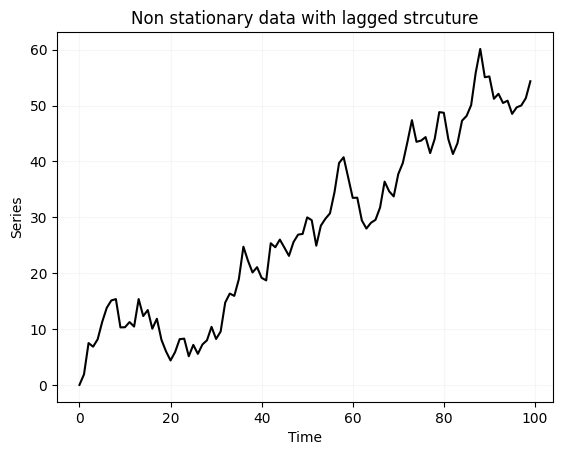

In [37]:
plt.plot(time, lagged, color='black')
plt.title("Non stationary data with lagged strcuture")
plt.xlabel("Time")
plt.ylabel("Series")
plt.grid(alpha=0.1)
plt.show()

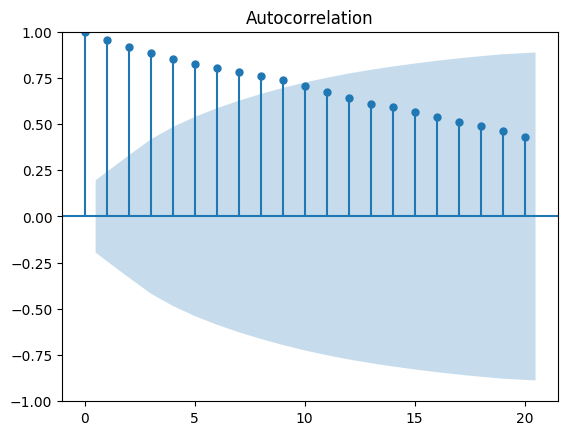

In [38]:
plot_acf(lagged)
plt.show()

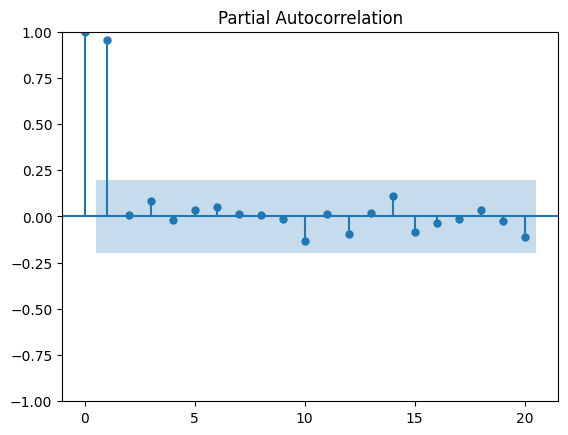

In [39]:
plot_pacf(lagged)
plt.show()

In [40]:
dftest = adfuller(lagged, autolag="AIC")
dfoutputs = pd.Series(dftest[:4], index=["Test statistic", "p-value", '#lags used', "Numner of observation used"])
for key, val in dftest[4].items():
  dfoutputs[f'Critical-values: {key}%'] = val

dfoutputs

,0
Test statistic,-0.905039
p-value,0.786308
#lags used,0.000000
Numner of observation used,99.000000
Critical-values: 1%%,-3.498198
Critical-values: 5%%,-2.891208
Critical-values: 10%%,-2.582596


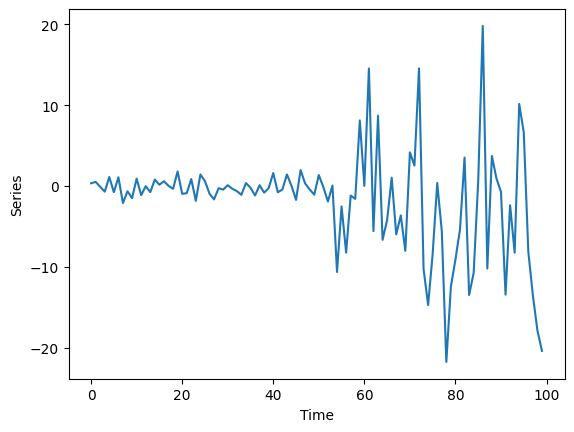

In [46]:
# Other data such as Heteroscedasticity

np.random.seed(1412)

level_1 = np.random.normal(loc=0, scale=1, size=50)
level_2 = np.random.normal(loc=0, scale=10, size=50)
heteroscedasticity = pd.Series(np.append(level_1,level_2))

plt.plot(time, heteroscedasticity)
plt.xlabel("Time")
plt.ylabel("Series")
plt.show()

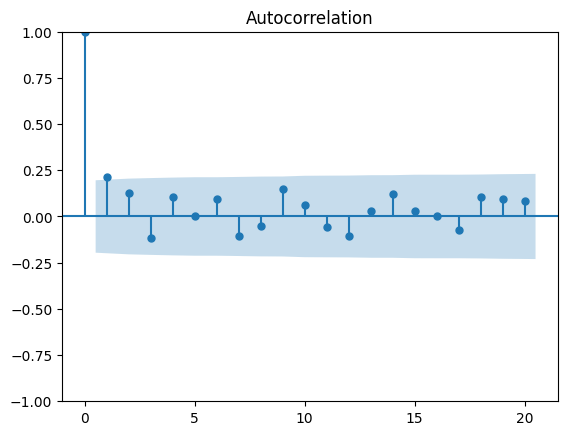

In [47]:
plot_acf(heteroscedasticity)
plt.show()

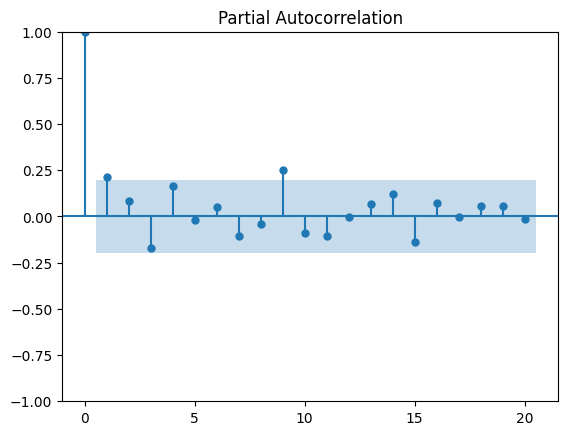

In [48]:
plot_pacf(heteroscedasticity)
plt.show()

In [49]:
dftest = adfuller(heteroscedasticity, autolag="AIC")
dfoutputs = pd.Series(dftest[:4], index=["Test statistic", "p-value", '#lags used', "Numner of observation used"])
for key, val in dftest[4].items():
  dfoutputs[f'Critical-values: {key}%'] = val

dfoutputs

,0
Test statistic,-7.395508e+00
p-value,7.797416e-11
#lags used,0.000000e+00
Numner of observation used,9.900000e+01
Critical-values: 1%%,-3.498198e+00
Critical-values: 5%%,-2.891208e+00
Critical-values: 10%%,-2.582596e+00


In [50]:
mean_a = heteroscedasticity.rolling(window=window).mean()
mean_a.dropna(inplace=True)

std_a = heteroscedasticity.rolling(window=window).std()
std_a.dropna(inplace=True)

In [52]:
print(mean_a) # This can detect that mean isn't stable

14   -0.201649
15   -0.213894
16   -0.208377
17   -0.200674
18   -0.176775
        ...   
95   -1.286655
96   -1.471684
97   -2.609125
98   -2.902467
99   -3.545638
Length: 86, dtype: float64


# Section 4: converting to stationary

In [62]:
def test_stationary(datasets, window=2, col_name="#Passengers", autolag="AIC"):
  # rolling statistics
  mean_a = datasets.rolling(window=window).mean()
  mean_a.dropna(inplace=True)
  std_a = datasets.rolling(window=window).std()
  std_a.dropna(inplace=True)

  # plot acf
  plot_acf(datasets)
  plt.show()

  # plot pacf
  plot_pacf(datasets)
  plt.show()

  plt.plot(datasets, label="Original", color='blue')
  plt.plot(mean_a, label='Mean', color='red')
  plt.plot(std_a, label="STD", color='green')
  plt.plot(mean_a + std_a, label='Upper bound', color='green')
  plt.plot(mean_a - std_a, label='Lower bound', color='green')
  plt.show()

  dftest = adfuller(datasets, autolag=autolag)
  dfoutputs = pd.Series(dftest[:4], index=["Test statistic", "p-value", '#lags used', "Numner of observation used"])
  for key, val in dftest[4].items():
    dfoutputs[f'Critical-values: {key}%'] = val

  print(dfoutputs)


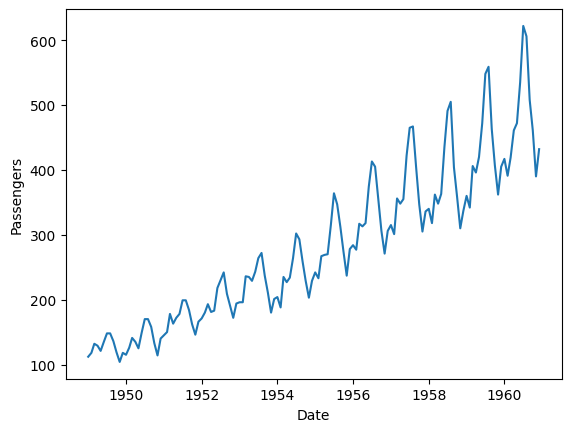

In [63]:
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.plot(df["#Passengers"])
plt.show()

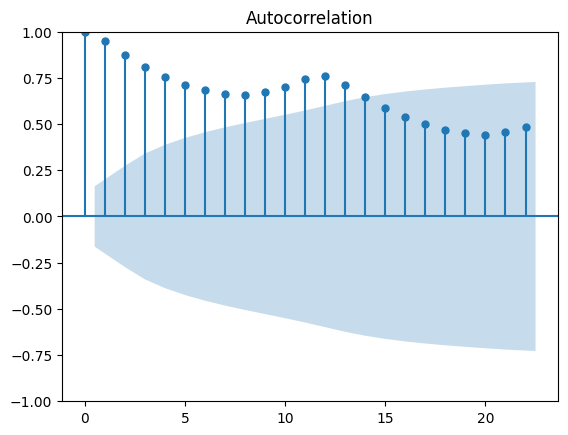

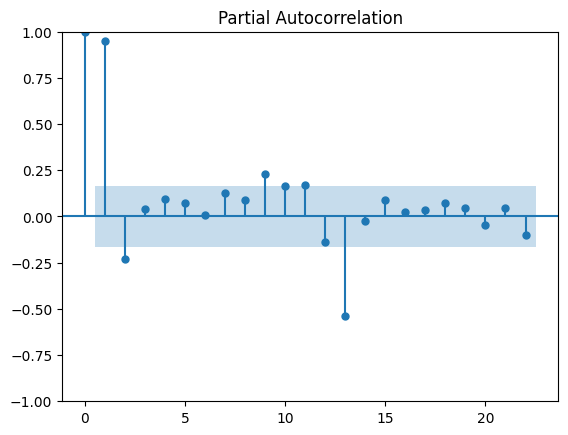

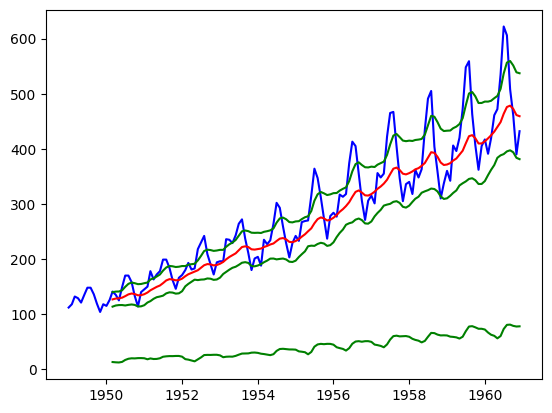

Test statistic                  0.815369
p-value                         0.991880
#lags used                     13.000000
Numner of observation used    130.000000
Critical-values: 1%%           -3.481682
Critical-values: 5%%           -2.884042
Critical-values: 10%%          -2.578770
dtype: float64


In [64]:
test_stationary(df, window=window)

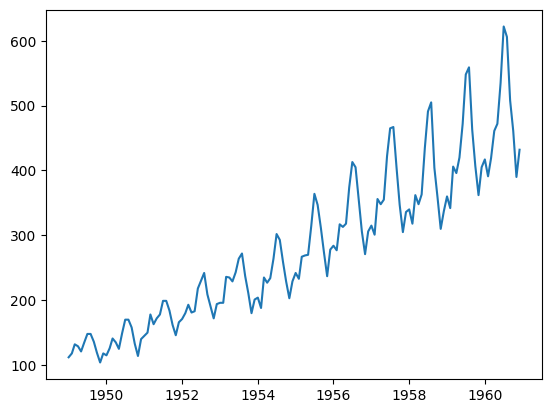

In [66]:
plt.plot(df)

# First method: log tranformations

**Reduce high variance**

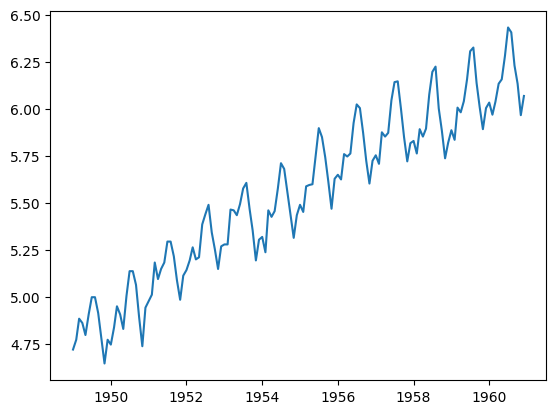

In [67]:
df_logscale = np.log(df)
plt.plot(df_logscale)
plt.show()
# reduce variance but still have trend and seasonality

# Second method: Differencing moving average

**Remove trend**

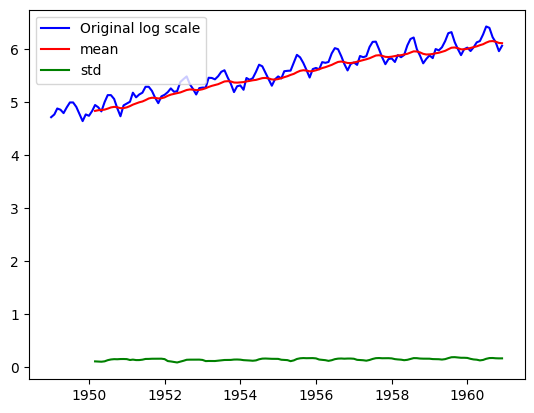

In [69]:
movingAverage = df_logscale.rolling(window=window).mean()
movingStd = df_logscale.rolling(window=window).std()
plt.plot(df_logscale, color='blue', label='Original log scale')
plt.plot(movingAverage, color='red', label='mean')
plt.plot(movingStd, color='green', label='std')
plt.legend(loc='upper left')
plt.show()

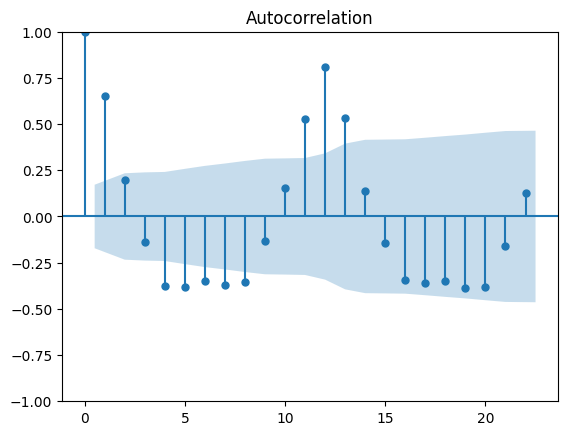

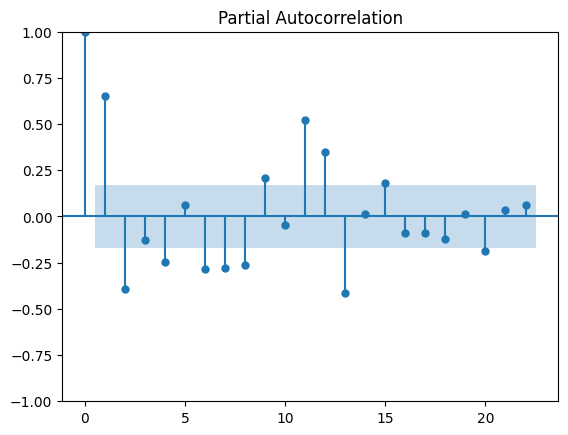

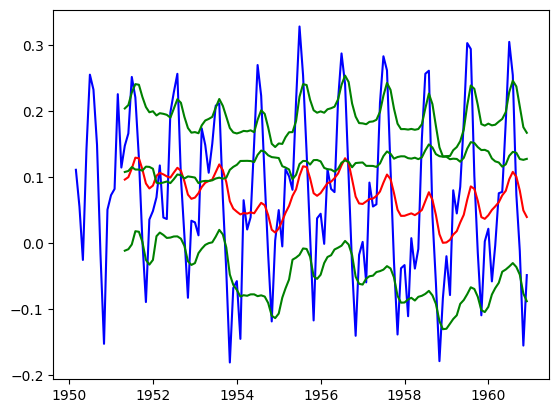

Test statistic                 -3.079301
p-value                         0.028123
#lags used                     13.000000
Numner of observation used    116.000000
Critical-values: 1%%           -3.488022
Critical-values: 5%%           -2.886797
Critical-values: 10%%          -2.580241
dtype: float64


In [70]:
minus_movingAverage = df_logscale - movingAverage
minus_movingAverage.dropna(inplace=True)
test_stationary(minus_movingAverage, window=window)

# Third method: Difference with exponential moving average


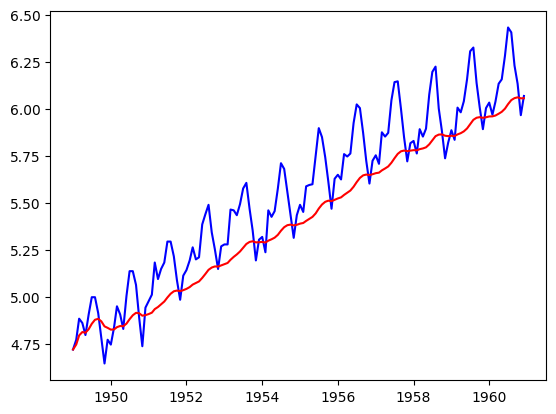

In [71]:
exponential_move = df_logscale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(df_logscale, color='blue', label='Original log scale')
plt.plot(exponential_move, color='red', label='mean')

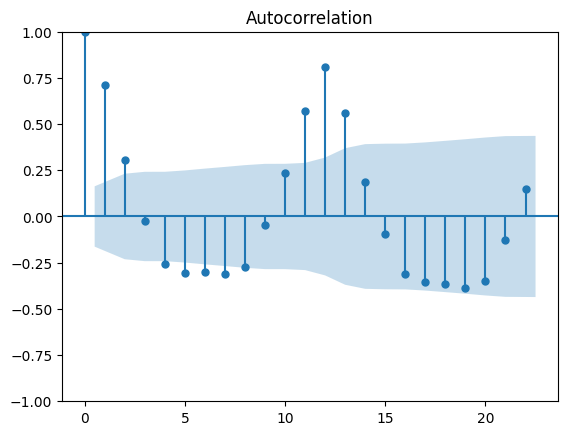

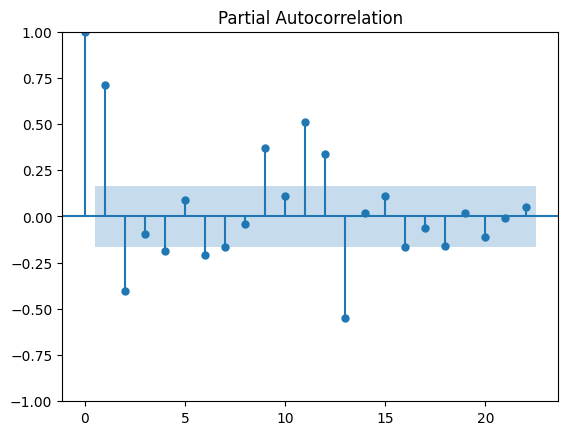

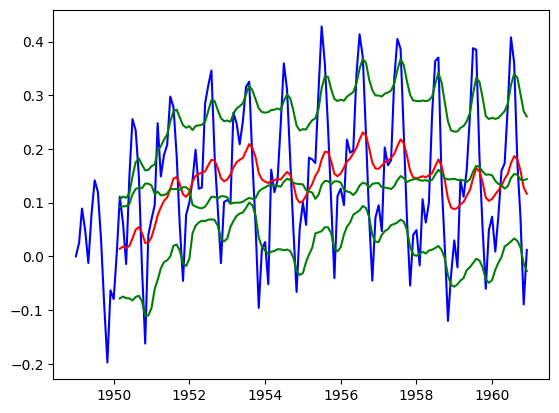

Test statistic                 -3.601262
p-value                         0.005737
#lags used                     13.000000
Numner of observation used    130.000000
Critical-values: 1%%           -3.481682
Critical-values: 5%%           -2.884042
Critical-values: 10%%          -2.578770
dtype: float64


In [72]:
logscale_minus_expo = df_logscale - exponential_move
logscale_minus_expo.dropna(inplace=True)
test_stationary(logscale_minus_expo, window=window)

# Fourth method: Difference with time lagged data

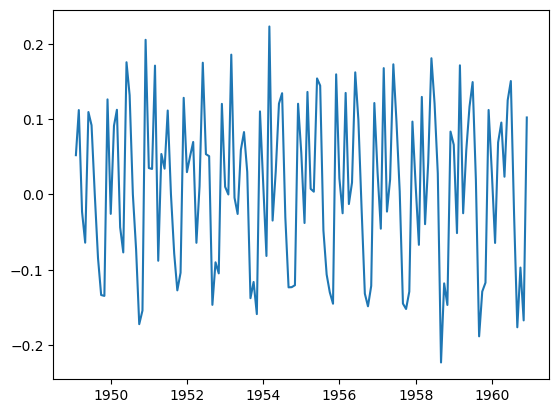

In [73]:
log_lag = df_logscale - df_logscale.shift()
plt.plot(log_lag)

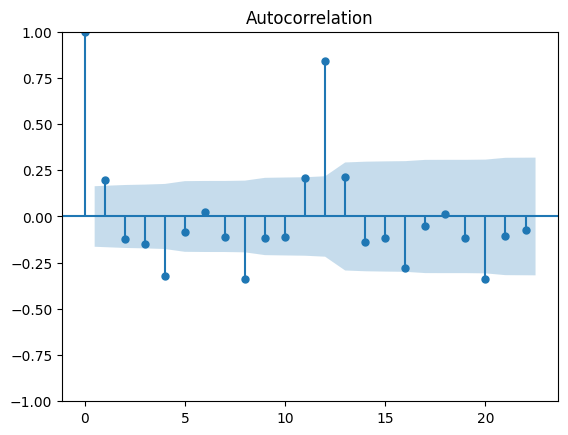

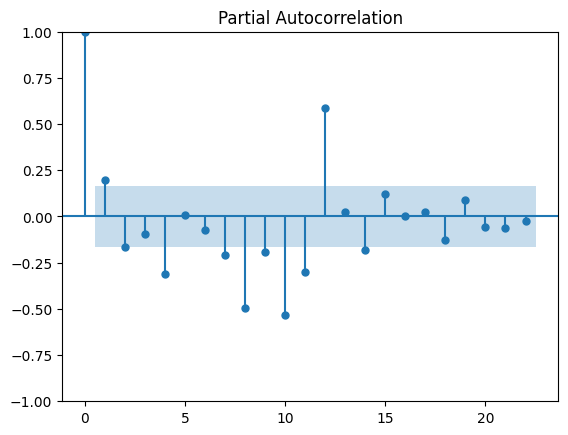

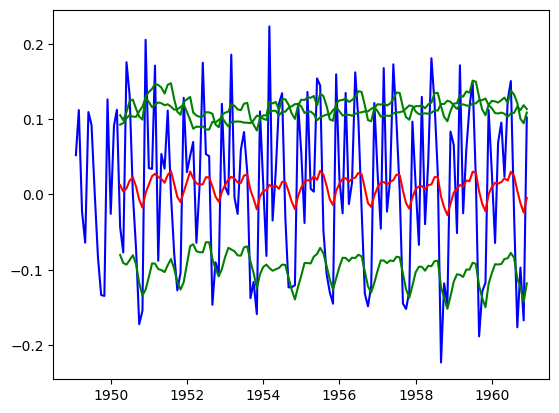

Test statistic                 -2.717131
p-value                         0.071121
#lags used                     14.000000
Numner of observation used    128.000000
Critical-values: 1%%           -3.482501
Critical-values: 5%%           -2.884398
Critical-values: 10%%          -2.578960
dtype: float64


In [74]:
log_lag.dropna(inplace=True)
test_stationary(log_lag, window=window)

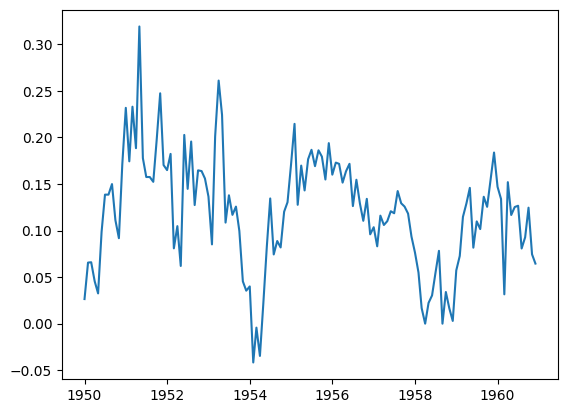

In [79]:
# To remove seasonal, Have to shift with period of data such as this period is
# 12 so shift with 12
lag_seasonal = df_logscale - df_logscale.shift(periods=12)
lag_seasonal.dropna(inplace=True)
plt.plot(lag_seasonal)
plt.show()

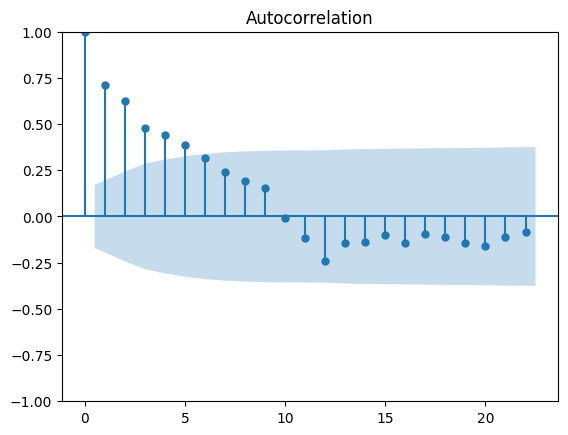

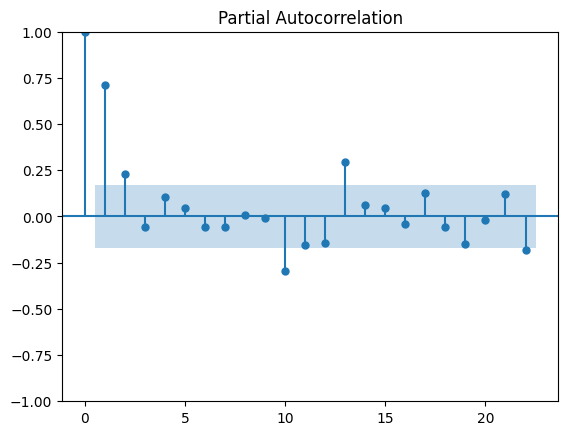

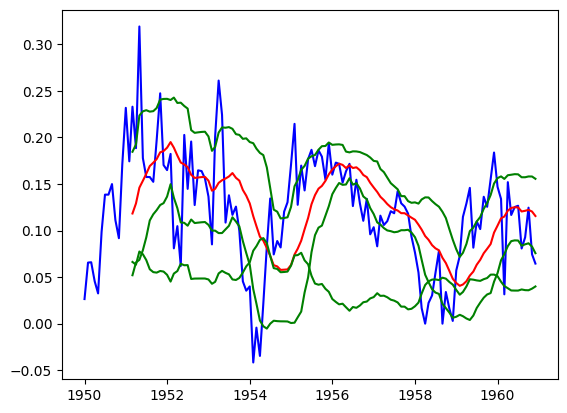

Test statistic                 -2.709577
p-value                         0.072396
#lags used                     12.000000
Numner of observation used    119.000000
Critical-values: 1%%           -3.486535
Critical-values: 5%%           -2.886151
Critical-values: 10%%          -2.579896
dtype: float64


In [80]:
test_stationary(lag_seasonal, window=window)

# Last method to remove seasonal: Remove with its seasonal with decompose function

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [99]:
ss_decompose = seasonal_decompose(log_lag, model='additive', period=12)

trend = ss_decompose.trend
seasonal = ss_decompose.seasonal
residual = ss_decompose.resid

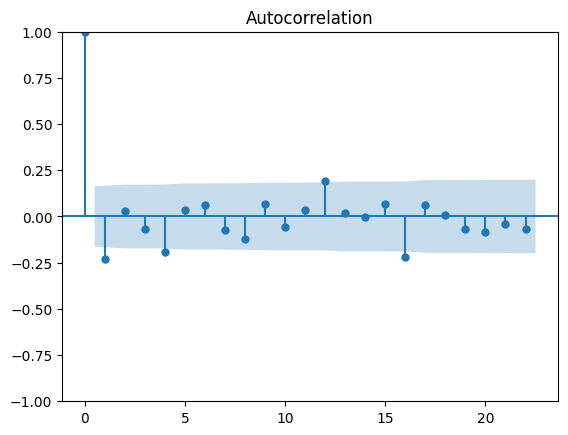

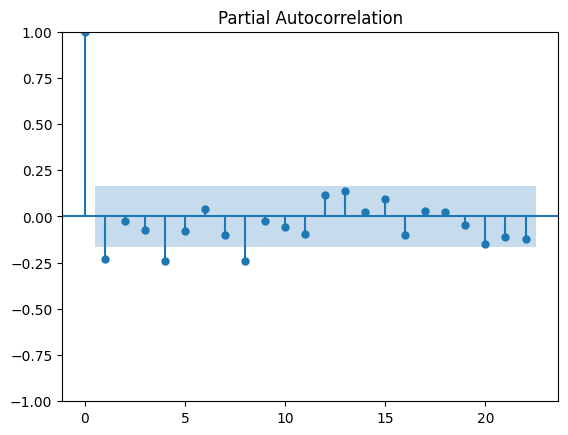

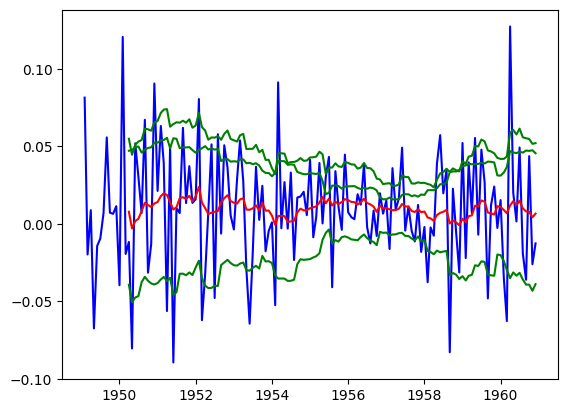

Test statistic               -6.580916e+00
p-value                       7.518314e-09
#lags used                    7.000000e+00
Numner of observation used    1.350000e+02
Critical-values: 1%%         -3.479743e+00
Critical-values: 5%%         -2.883198e+00
Critical-values: 10%%        -2.578320e+00
dtype: float64


In [100]:
del_seasonal = log_lag.copy()
# del_seasonal = pd.Series(del_seasonal, index=df_logscale.index)
# del_seasonal.dropna(inplace=True)
del_seasonal["#Passengers"] = del_seasonal["#Passengers"] - seasonal
del_seasonal.dropna(inplace=True)

test_stationary(del_seasonal, window=window)

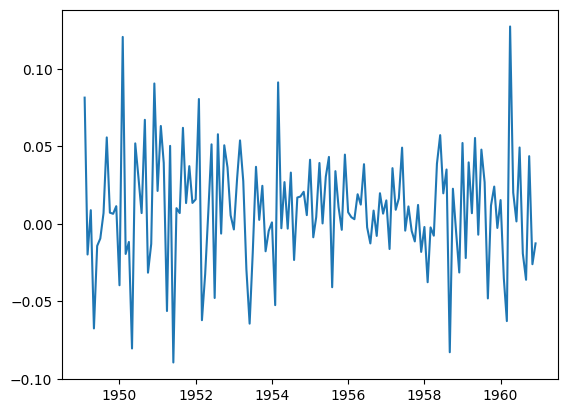

In [102]:
plt.plot(del_seasonal)
plt.show()